# Starter Framework for Machine Learning Projects 

## By Yosry Negm

<img src="photobyyosrynegm1.png">

In this article I'll demonstrate some sort of a framework for working on machine learning projects. As you may know, machine learning in general is about extracting knowledge from data therefore, most of machine learning projects will depend on a data collection - called <font color='green'>dataset</font> - from a specific domain on which,  we are investigating a certain problem to build a predictive model suitable for it. This model should follow certain set of steps to accomplish its purpose, In the following sections I will practically, introduce a simplified clarification about the main steps for performing statistical learning or building machine learning model. I Assumed that the explanation project is  implemented in Python programming language inside Jupiter Notebook (IPython) depending on using Numpy, Pandas, and Scikit-Learn packages.

<br><img src="fw.jpg"><br>
<center>The above diagram summarizes a simplified framework for working with machine learning projects.</center>

## Problem Statement

To build better models, you should clearly define the problem that you are trying to solve, including the strategy you will use to achieve the desired solution. I've chosen a simple application of Iris Species Classification in which we will create a simple machine learning model that could be used in distinguishing the species of some iris flowers by identifying some measurements associated with each iris such as the petals' length and width as well as sepals' length and the width, all measured in centimetres. We will depend on a data set of previously identified measurements by experts, they have been classified the flowers into the species stosa, versicolor, or virginica. Our mission is to build a model that can learn from these measurement, So that we can predict the species for a new iris<br><img src="iris.png">

## Algorithm Selection

Depending on the nature and characteristics of the problem under investigation we need to select algorithms and techniques suitable for solving it. Since we have measurements for which we know the correct species of iris, this is a <font color='green'>Supervised Learning</font> problem. In this problem, we want to predict one of several options (the species of iris). This is an example of a <font color='green'>classification</font> problem. The possible outputs (different species of irises) are called classes. Every iris in the data set belongs to one of three classes, so this problem is a three-class classification problem. The desired output for a single data point (an iris) is the species of this flower. For a particular data point, the species it belongs to is called its label or class.

## Project Preparation

To begin working with our project data, we'll first import the functionalities we need in our implementation such as Python libraries, setting our environment to allow us accomplish our mission as well as loading our dataset successfully: 

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

For Pretty display for plots in jupyter notebooks we may use:

In [67]:
%matplotlib inline

And to allow the use of the function display() for pandas data frames we use the following code:

In [68]:
from IPython.display import display

To Ignore warnings of loaded modules during runtime excution we could use the following code if needed:

In [69]:
import warnings
warnings.filterwarnings("ignore")

Then we start loading our dataset into a pandas DataFrame. The data that will be used here is the Iris dataset, a classical dataset in machine learning and statistics. It is included in scikit-learn within datasets module.

### <font color='grey'>Loading Data</font>

In [70]:
from sklearn.datasets import load_iris
iris=load_iris()
#printing feature names
print('features: %s'%iris['feature_names'])
#printing species of iris
print('target categories: %s'%iris['target_names'])
#iris data shape
print("Shape of data: {}".format(iris['data'].shape))

features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target categories: ['setosa' 'versicolor' 'virginica']
Shape of data: (150, 4)


The data of isis flowers contains the numeric measurements of sepal length, sepal width, petal length, and petal width and is stored as `NumPy array`, so to convert it to `pandas DataFrame` we will write the following code:

In [71]:
full_data=pd.DataFrame(iris['data'],columns=iris['feature_names'])
full_data['Classification']=iris['target']
full_data['Classification']=full_data['Classification'].apply(lambda x: iris['target_names'][x])

><font color='blue'>Note</font>: Here we are using built-in dataset that comes with `Sci-kit Learn` library but in practice, the data set often comes as csv files so we could use a code looks like the following commented one:

In [72]:
#myfile='MyFileName.csv'
#full_data=pd.read_csv(myfile, thousands=',',delimiter=';',encoding='latin1',na_values="n/a")

## Data Exploration

Before building a machine learning model, we must first analyze the dataset we are using for the problem, and Always we are expected to assess for common issues that may require preprocessing. So data exploration is a necessary action should be done before proceeding with our model implementation. This is done by showing a quick sample from the data, describing a The type of data, Knowing its shape or dimensions, and if needed, having basic statistics and information related to the loaded dataset. As well as exploring of input features and any abnormalities or interesting qualities about the data that may need to be addressed. Data exploration provides you with a deeper understanding of your datasets, including Dataset schemas, Value distributions, Missing values and Cardinality of categorical features.

To start exploring our dataset represented by The iris object that is returned by load_iris() and stored in mydata pandas DataFrame, we could display the first few entries for examination using the .head() function.

In [73]:
display(full_data.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Classification
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


To display more information about the structure of the data :

In [74]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
Classification       150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [75]:
full_data.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
Classification        object
dtype: object

To check if there are any null values present in the dataset. 

In [76]:
full_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Classification       0
dtype: int64

And to get more details about these null values we use:

In [77]:
def NullValues(theData):
    null_data = pd.DataFrame(
                              {'columns': theData.columns, 
                               'Sum': theData.isnull().sum(), 
                               'Percentage': theData.isnull().sum() * 100 / len(theData), 
                               'zeros Percentage': theData.isin([0]).sum() * 100 / len(theData)
                              }
                            )
    return null_data 

In [78]:
NullValues(full_data)

,columns,Sum,Percentage,zeros Percentage
sepal length (cm),sepal length (cm),0,0.0,0.0
sepal width (cm),sepal width (cm),0,0.0,0.0
petal length (cm),petal length (cm),0,0.0,0.0
petal width (cm),petal width (cm),0,0.0,0.0
Classification,Classification,0,0.0,0.0


From the above sample of our dataset, we can see that the dataset contains measurements for 150 different flowers. Each individual items are called examples, instances or samples in machine learning, and their properties (the 5 columns) are called features (4 features and one column is the `Target` or the class for each instance or example). The shape of the data array is the number of samples multiplied by the number of features. This is a convention in scikit-learn, and our data will always be assumed to be in this shape. Below, the detailed explaination of the features and the classes 
contained in our dataset:-<br>  
    
- **sepal length**: Represents the length of the sepal of the specified iris flower in centimeters. 
- **sepal width**: Represents the width of the sepal of the specified iris flower in centimeters. 
- **petal length**: Represents the length of the petal of the specified iris flower in centimeters. 
- **petal width**:  Represents the width of the petal of the specified iris flower in centimeters. 


Displaying statistics about the new dataset we use the following code :

In [79]:
full_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


You could compare min and max and see if scale is large and there's a need for Scaling of numerical features.

Since we're interested in the classification of iris flowers i.e we are observing only the classes or label of each flower based on the given measurements or features, we can remove the `Classification` feature from this dataset and store it as its own separate variable `Labels`. We will use these labels as our prediction targets.
the code below will remove `Classification` as a feature of the dataset and store it in `Labels`.

In [80]:
# Store the 'Survived' feature in a new variable and remove it from the dataset

Labels = full_data['Classification']
mydata = full_data.drop('Classification', axis = 1)

# Show the new dataset with 'Survived' removed
display(mydata.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [81]:
display(Labels.head())

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: Classification, dtype: object

The `Classification` feature removed from the DataFrame. Note that data (the iris flowers data) and `Labels` (the labels or classifications of iris flowers) are now paired. That means for any iris flower `mydata.loc[i]`, they have the a classification or label  `Labels[i]`.

To filter the input data by Removing elements that do not match certain provided condition. The following function takes a data list as input and returns a filtered list as shown in the code below:-

In [82]:
def filter_data(data, conditionField,conditionOperation,conditionValue):
    """
    Remove elements that do not match the condition provided.
    Takes a data list as input and returns a filtered list.
    Conditions passed as separte parameresfor the field,operation and value.
    
    """
   
    #field, op, value = condition.split(" ") # Example: ["field == 'value'", 'field < 18']
    field, op, value = conditionField,conditionOperation,conditionValue
    
    # convert value into number or strip excess quotes if string
    try:
        value = float(value)
    except:
        value = value.strip("\'\"")
    
    # get booleans for filtering
    if op == ">":
        matches = data[field] > value
    elif op == "<":
        matches = data[field] < value
    elif op == ">=":
        matches = data[field] >= value
    elif op == "<=":
        matches = data[field] <= value
    elif op == "==":
        matches = data[field] == value
    elif op == "!=":
        matches = data[field] != value
    else: # catch invalid operation codes
        raise Exception("Invalid comparison operator. Only >, <, >=, <=, ==, != allowed.")
    
    # filter data and outcomes
    data = data[matches].reset_index(drop = True)
    return data

As an example we could filter our data to be list of all flowers that has the attribute `sepal width (cm)` less than `3` as follows:-

In [83]:
filtered_data=filter_data(mydata, 'sepal width (cm)','<','3')
display(filtered_data.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,4.4,2.9,1.4,0.2
1,4.5,2.3,1.3,0.3
2,5.5,2.3,4.0,1.3
3,6.5,2.8,4.6,1.5
4,5.7,2.8,4.5,1.3


To sort our data we could use:

In [131]:
sorted_data = mydata.sort_values(by=['sepal length (cm)'],ascending=False)
display(sorted_data.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
131,7.9,3.8,6.4,2.0
135,7.7,3.0,6.1,2.3
122,7.7,2.8,6.7,2.0
117,7.7,3.8,6.7,2.2
118,7.7,2.6,6.9,2.3


## Data Visualization

Before building a machine learning model it is a good idea to look at our data for more understanding about the relationships between the various components constituting it. Inspecting our data is a good way to find abnormalities and peculiarities. Maybe some of your irises were measured using inches and not centimeters, for example. In the real world, inconsistencies in the data and unexpected measurements are very common. One of the best ways to inspect data is to do some visualization over our data. We could use python `matplotlib` library or `seaborn` library for plotting and visualizing the data using different types of plots like bar plot, box plot, scatter plot etc.

The following function displays `Bar graph` for any single arbitrary attribute from our data:-

In [84]:
def BarGraph(theData,target,attributeName):
    xValues = np.unique(target)
    yValues=[]
    for label in xValues:
        yValues.append(theData.loc[target==label, attributeName].idxmax())
    plt.bar(xValues,yValues)
    plt.xticks(xValues, target)
    plt.title(attributeName) 
    plt.show()

The code below tests the above function by displaying bar graph illustration for `sepal length (cm)` as an example.

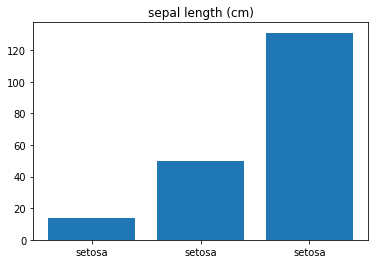

In [85]:
BarGraph(mydata,Labels,'sepal length (cm)')

Also, we could display multiple bar graphs together at the same time using the following function:

In [86]:
def BarGraphs(theData,target,attributeNamesList,graphsTitle='Attributes Classifications'):
    xValues = np.unique(target)
    fig, ax = plt.subplots(nrows=int(len(attributeNamesList)/2), ncols=2,figsize=(16, 8))
    k=0
    for row in ax:
        for col in row:
            yValues=[]
            for label in xValues:
                yValues.append(theData.loc[target==label, attributeNamesList[k]].idxmax()) 
            col.set_title(attributeNamesList[k])
            #col.set(xlabel=" x Label", ylabel=' y Label')
            col.bar(xValues,yValues)
            k=k+1
    fig.suptitle(graphsTitle)    
    plt.show()

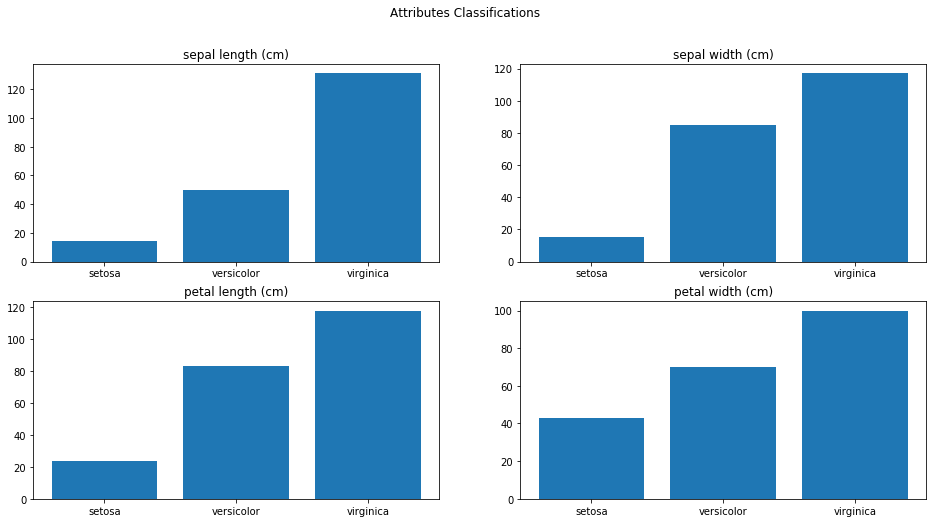

In [87]:
BarGraphs(mydata,Labels,['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'])

Visualizing value distribution across our dataset, gives more understanding of attribute distributions inside the dataset to check the nature of that distribution if it is normal or uniform distribution and this could be done as follows:-

In [88]:
def Distribution(theData,datacolumn,type='value'):
    if type=='value':
        print("Distribution for {} ".format(datacolumn))
        theData[datacolumn].value_counts().plot(kind='bar')
    elif type=='normal':
        attr_mean=theData[datacolumn].mean() # Mean of the attribute values
        attr_std_dev=full_data[datacolumn].std() # Standard Deviation of the attribute values
        ndist=np.random.normal(attr_mean, attr_std_dev, 100)
        norm_ax = sns.distplot(ndist, kde=False )
        plt.show()
        plt.close()
    elif type=='uniform':
        udist = np.random.uniform(-1,0,1000)
        uniform_ax = sns.distplot(udist, kde=False )
        plt.show()    
    elif type=='hist':
        theData[datacolumn].hist()

To test visualizing value ditribution for the `Classification` attribute we could write:-

Distribution for Classification 


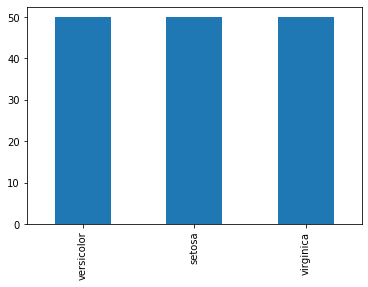

In [89]:
Distribution(full_data, 'Classification')

Another visualization example is for normal value distribution as shown below:-

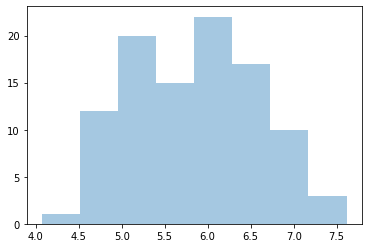

In [90]:
Distribution(full_data, 'sepal length (cm)',type='normal')

For uniform distribution visualization check the following:

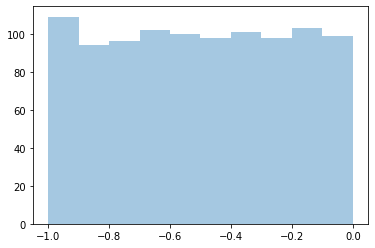

In [91]:
Distribution(full_data, 'sepal length (cm)',type='uniform')

To show the Histograph diagram for a certain attribute we use the following:

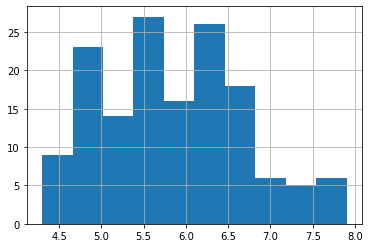

In [92]:
Distribution(full_data, 'sepal length (cm)',type='hist')

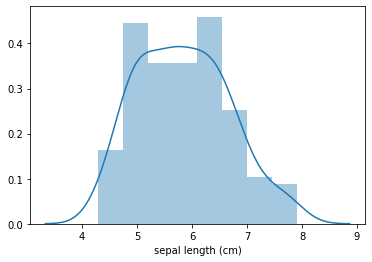

In [93]:
sns.distplot(full_data['sepal length (cm)'])

It appears that the attribute `sepal length (cm)` has a normal distribution.

To explore how these features are correlated to each other we could use `heatmap` in seaborn library. We can see that Sepal Length and Sepal Width features are slightly correlated with each other.

[]

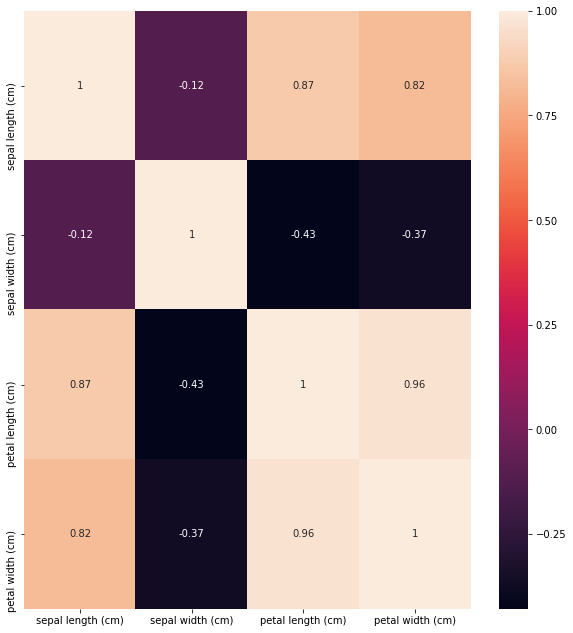

In [94]:
plt.figure(figsize=(10,11))
sns.heatmap(mydata.corr(),annot=True)
plt.plot()

To observe relationships between features in our dataset we could use a scatter plot. A scatter plot of the data puts one feature along the x-axis and another along the y-axis, and draws a dot for each data point. For scatter plotting how our data is distributed based on Sepal Length Width features we could use the code below :

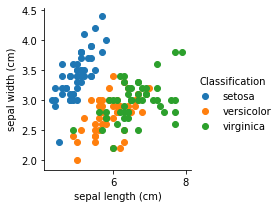

In [95]:
sns.FacetGrid(full_data,hue="Classification").map(plt.scatter,"sepal length (cm)","sepal width (cm)").add_legend()
plt.show()

Similarly scatter plot of data based on Petal Length and Width features

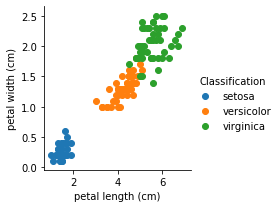

In [96]:
sns.FacetGrid(full_data,hue="Classification").map(plt.scatter,"petal length (cm)","petal width (cm)").add_legend()
plt.show()

To plot datasets with more than three features we could use a `pair plot`, which looks at all possible pairs of features. If you have a small number of features, such as the four we have here, this is quite reasonable. You should keep in mind, however, that a pair plot does not show the interaction of all of features at once, so some interesting aspects of the data may not be revealed when visualizing it this way. We could use the `pairplot` function in the seaborn library as follows:

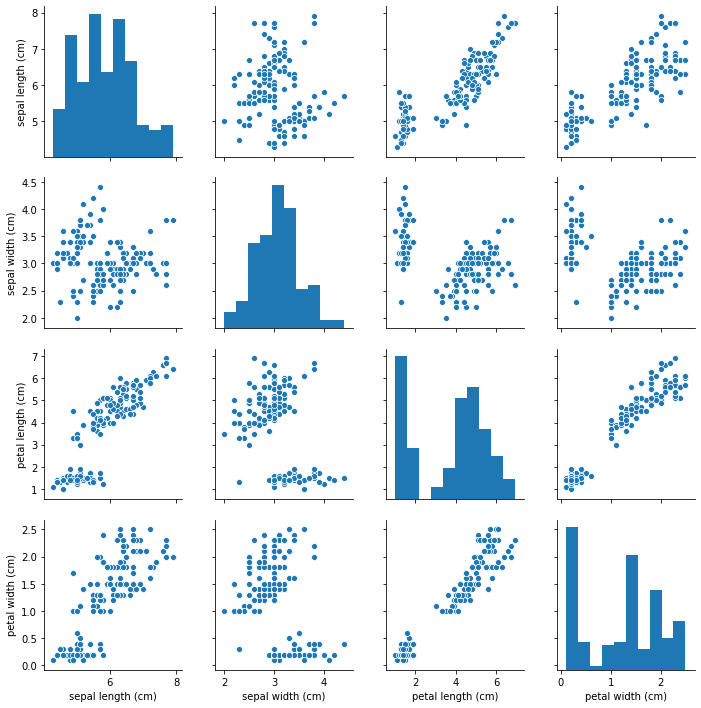

In [97]:
sns.pairplot(mydata)

Another way to do scatter plotting is to use `scatter matrix` existed in `plotting` module comes with `pandas` library. the following code creates a scatter matrix from the dataframe, and colors will be by Classes or labels:-

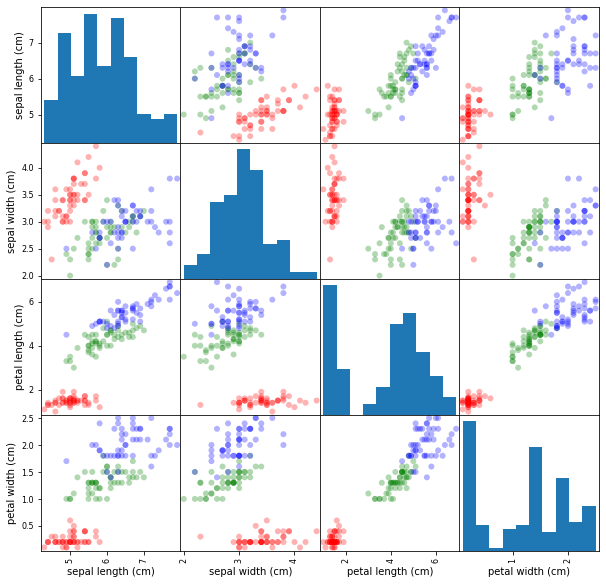

In [98]:
from pandas.plotting import scatter_matrix
colors = list()
palette = {0: "red", 1: "green", 2: "blue"}
for c in np.nditer(iris.target): colors.append(palette[int(c)])
grr = scatter_matrix(mydata, alpha=0.3,figsize=(10, 10), diagonal='hist', color=colors, marker='o', grid=True)


From the plots, we can see that the three classes seem to be relatively well separated using the sepal and petal measurements. This means that a machine learning model will likely be able to learn to separate them.

To show density of the length and width in the species we could use `violin plot` of all the input variables against output variable which is Species.

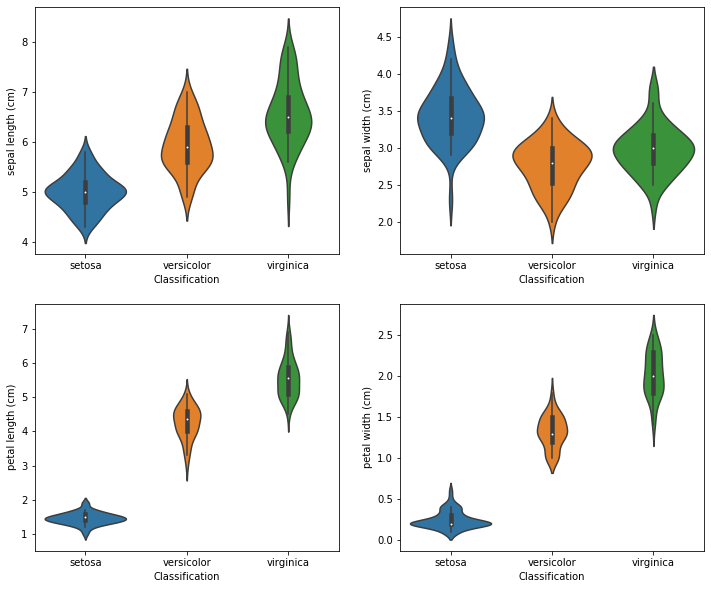

In [99]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.violinplot(x="Classification",y="sepal length (cm)",data=full_data)
plt.subplot(2,2,2)
sns.violinplot(x="Classification",y="sepal width (cm)",data=full_data)
plt.subplot(2,2,3)
sns.violinplot(x="Classification",y="petal length (cm)",data=full_data)
plt.subplot(2,2,4)
sns.violinplot(x="Classification",y="petal width (cm)",data=full_data)

The `thinner part denotes that there is less density` whereas the `fatter part conveys higher density`.

And similarly we may use `boxplot` to see how the categorical feature `Classification` is distributed with all other input and also, to check for Outliers variables :-

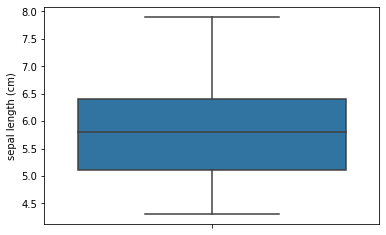

In [100]:
sns.boxplot(y=full_data['sepal length (cm)'])

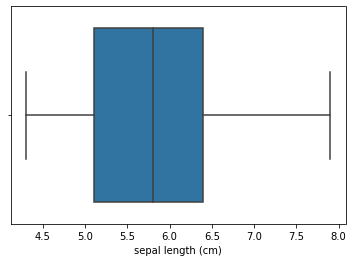

In [101]:
sns.boxplot(x=full_data['sepal length (cm)'])

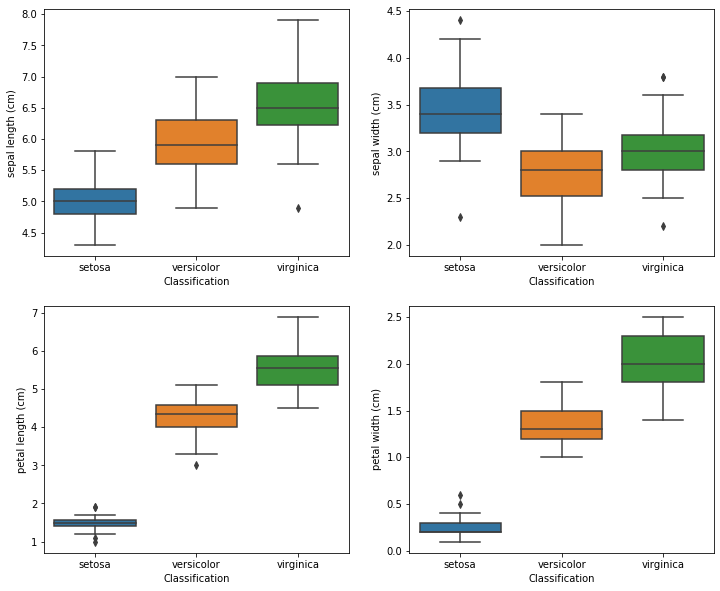

In [102]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x="Classification",y="sepal length (cm)",data=full_data)
plt.subplot(2,2,2)
sns.boxplot(x="Classification",y="sepal width (cm)",data=full_data)
plt.subplot(2,2,3)
sns.boxplot(x="Classification",y="petal length (cm)",data=full_data)
plt.subplot(2,2,4)
sns.boxplot(x="Classification",y="petal width (cm)",data=full_data)

To check Cardinality:

In [103]:
def count_unique_values(theData, categorical_columns_list):
    cats = theData[categorical_columns_list]
    rValue = pd.DataFrame({'cardinality': cats.nunique()})
    return rValue

In [104]:
categorical_features_list = [ 'Classification','sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
val_df = count_unique_values(full_data, categorical_features_list) 
val_df

,cardinality
Classification,3
sepal length (cm),35
sepal width (cm),23
petal length (cm),43
petal width (cm),22


To perform demographic analysis you may use some code like:

In [105]:
def demographic(theData,demographic_features,bin_min,bin_max,bin_length):
    demo = full_data[demographic_features]
    bins = np.arange(bin_min, bin_max, bin_length)
    a_bin = [str(x) for x in np.arange(bin_min, bin_max, bin_length) ]
    a_labels = ["".join(x) for x in zip( [x + " - " for x in a_bin[:-1]], a_bin[1:])]
    demo['bins'] = pd.cut(demo['sepal length (cm)'], bins=bins, labels=a_labels)
    return demo 

In [106]:
demo_features = [ 'Classification','sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
rValue=demographic(full_data,demo_features,0,10,2)
display(rValue) 

,Classification,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),bins
0,setosa,5.1,3.5,1.4,0.2,4 - 6
1,setosa,4.9,3.0,1.4,0.2,4 - 6
2,setosa,4.7,3.2,1.3,0.2,4 - 6
3,setosa,4.6,3.1,1.5,0.2,4 - 6
4,setosa,5.0,3.6,1.4,0.2,4 - 6
5,setosa,5.4,3.9,1.7,0.4,4 - 6
6,setosa,4.6,3.4,1.4,0.3,4 - 6
7,setosa,5.0,3.4,1.5,0.2,4 - 6
8,setosa,4.4,2.9,1.4,0.2,4 - 6
9,setosa,4.9,3.1,1.5,0.1,4 - 6


Grouping by bins :

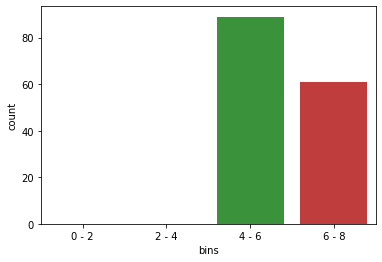

In [107]:
ax = sns.countplot(x="bins", data=rValue)

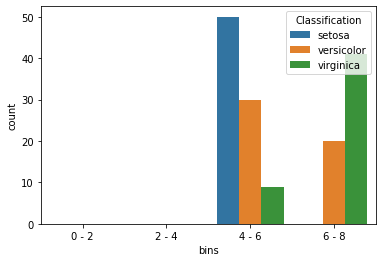

In [108]:
ax = sns.countplot(x="bins", hue="Classification", data=rValue)

## Splitting dataset into training and testing data

We cannot use the same data we used to build the model to evaluate it. This is because our model can always simply remember the whole training set, and will therefore always predict the correct label for any point in the training set. This `remembering` does not indicate to us whether our model will generalize well i.e. whether it will also perform well on new data. So, Before using a machine learning model that can predict from unseen data, we should have some way  to  know whether it actually works or not. Hence, we need to split the labeled data into two parts. One part of the data is used to build our machine learning model, and is called the `training data` or `training set`. The rest of the data will be used to measure how well the model works; this is called the `test data`, or `test set`.

`scikit-learn` contains a function that shuffles the dataset and splits it for you: the `train_test_split` function. This function extracts 75% of the rows in the data as the `training set`, together with the corresponding labels for this data. The remaining 25% of the data, together with the remaining labels, is declared as the `test set`.

In `scikit-learn`, data is usually denoted with a capital X, while labels are denoted by a lowercase y. This is inspired by the standard formulation f(x)=y in mathematics, where x is the input to a function and y is the output. Following more conventions
from mathematics, we use a capital X because the data is a two-dimensional array (a matrix) and a lowercase y because the  target is a one-dimensional array (a vector). Let’s call train_test_split on our data and assign the outputs using this  following code:-

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mydata,Labels, random_state=0)

Before making the split, the train_test_split function shuffles the dataset using a pseudorandom number generator. If we just
took the last 25% of the data as a test set, all the data points would have the label 2, as the data points are sorted by the label (see the output for iris['target'] shown earlier). Using a test set containing only one of the three classes would not tell us much about how well our model generalizes, so we shuffle our data to make sure the test data contains data from all classes. To make sure that we will get the same output if we run the same function several times, we provide the pseudorandom number generator with a fixed seed using the random_state parameter. This will make the outcome deterministic, so this line will always have the same outcome. 

The output of the train_test_split function is X_train, X_test, y_train, and y_test, which are all NumPy arrays. X_train contains 75% of the rows of the dataset, and X_test contains the remaining 25%:

In [110]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [111]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


## Build the model

Now we can start building the actual machine learning model. There are many classification algorithms in scikit-learn that we could use. Here we will use a `k-nearest neighbors classifier`, which is easy to understand. Building this model only consists of
storing the training set. To make a prediction for a new data point, the algorithm finds the point in the training set that is closest to the new point. Then it assigns the label of this training point to the new data point.

The `k` in `k-nearest neighbors` signifies that instead of using only the closest neighbor to the new data point, we can consider any fixed number k of neighbors in the training (for example, the closest three or five neighbors). Then, we can make a prediction using the majority class among these neighbors. For simplification, we’ll use only a single neighbor.

All machine learning models in `scikit-learn` are implemented in their own classes, which are called Estimator classes. The `k-nearest neighbors classification algorithm` is implemented in the `KNeighborsClassifier class` in the `neighbors` module. Before we can use the model, we need to instantiate the class into an object. This is when we will set any parameters of the model. The most important parameter of KNeighbor sClassifier is the `number of neighbors`, which we will set to 1:

In [112]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

The knn object encapsulates the algorithm that will be used to build the model from the training data, as well the algorithm to make predictions on new data points. It will also hold the information that the algorithm has extracted from the training data. In the case of KNeighborsClassifier, it will just store the training set. To build the model on the training set, we call the `fit` method of the knn object, which takes as arguments the NumPy array `X_train` containing the training data and the NumPy array `y_train` of the corresponding training labels:

In [113]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

The `fit` method returns the knn object itself (and modifies it in place), so we get a string representation of our classifier. The representation shows us which parameters were used in creating the model. Nearly all of them are the default values, but you can also find n_neighbors=1, which is the parameter that we passed. Most models in scikit-learn have many parameters, but the majority of them are either speed optimizations or for very special use cases. You don’t have to worry about the other
parameters shown in this representation. Printing a scikit-learn model can yield very long strings, but don’t be intimidated by these. So, we will not show the output of fit because it doesn’t contain any new information.

We can now make predictions using this model on new data for which we might not know the correct labels. Imagine we found an iris in the wild with a sepal length of 5 cm, a sepal width of 2.9 cm, a petal length of 1 cm, and a petal width of 0.2 cm.
What species of iris would this be? We can put this data into a NumPy array, again by calculating the shape—that is, the number of samples (1) multiplied by the number of features (4):

In [114]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


Note that we made the measurements of this single flower into a row in a twodimensional NumPy array, as scikit-learn always expects two-dimensional arrays for the data. To make a prediction, we call the predict method of the knn object:

In [115]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))

Prediction: ['setosa']


Our model predicts that this new iris belongs to the class or label or species `setosa`. But how do we know whether we can trust our model? We don’t know the correct species of this sample, which is the whole point of building the model!

## Model Evaluation 

For any project, We need to clearly define the metrics or calculations we will use to measure performance of our model or the
results in our project i.e to measure the performance of our predictions, we need a metric to score our predictions against the true classifications of the given examples. These calculations and metrics should be justified based on the characteristics of the problem and problem domain. In machine learning classification models, we usually use a variety of performance measure metrics. From the measures that are commonly applied to classification problems we could mention  `Accuracy (A)`, `Precision (P)`, `Recall (R)`, and `F1-Score`, ... etc.

[Classification Performance metrics]

[Classification Performance metrics]: https://developers.google.com/machine-learning/crash-course/classification/true-false-positive-negative

### Accuracy

`Accuracy` or the classification rate measures how often is the classifier correct and it is defined as the fraction of predictions our model got right. The accuracy score is computed from the following formula:<br><img src="acc1.png">

To know how *accurate* our predictions are, we will calculate the proportion of cases where our prediction of their diagnosis is correct. The code below will create our `GetAccuracy` function that calculates the accuracy score.

In [116]:
def GetAccuracy(datasetClasses, PredictedClasses):
    """ Returns accuracy score for input Dataset Classes/labels and Predicted Classes/labels """
    # Ensure that the number of predictions matches number of classes/labels
    if len(datasetClasses) == len(PredictedClasses): 
        # Calculate and return the accuracy as a percent
        return "Predictions have an accuracy of {:.2f}%.".format((datasetClasses == PredictedClasses).mean()*100)
    else:
        return "Number of predictions does not match number of Labels/Classes!"

**Example:** *Out of the first five flowers, if we predict that all of them are the list `predictions = ['setosa','versicolor','versicolor','setosa','setosa']`, So we would expect the accuracy of our predictions to be as follows:-

In [117]:
# Test the 'accuracy_score' function
predictions = ['setosa','versicolor','versicolor','setosa','setosa']
print(GetAccuracy(Labels[:5], predictions))

Predictions have an accuracy of 60.00%.


Also as second example we could assume as a prediction that all flowers in our dataset are predicted as `setosa`. So, the code below will always predict  that all flowers in our dataset are `setosa`.

In [118]:
def predictions_example(data):
    predictions = []
    for flower in data:
        # Predict the survival of 'passenger'
        predictions.append('setosa')
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_example(Labels)

* To Know how accurate would a prediction be that all of the flowers has specis of `setosa` ? The code below shows the accuracy of this prediction.

In [119]:
print(GetAccuracy(Labels, predictions))

Predictions have an accuracy of 33.33%.


### Confusion Matrix

In the case of statistical `classification`, we could use the so called `confusion matrix`, also known as an `error matrix`. A confusion matrix is considered as a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix. The confusion matrix shows the ways in which your classification model is confused when it makes predictions. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

<img src="cm.png"> 

A `confusion matrix` is constructed as a table that is often used to describe the performance of a `classification` model (or “classifier”) on a set of test data for which the true/real/actual values are known.  They are defined in terms of `Positive classes` which are the observations that are `positive` (for example: Chest X-ray image indicates presence of Pneumonia) and the `Negative Classes` which are the observations that are `not positive` (for example: Chest X-ray image indicates absence of Pneumonia i.e Normal). To compute performance metrics using confusion matrix we should count the following four values:-

- True Positives (`TP`) : Observations that are `positive`, and is predicted to be `positive`.
- False Positives (`FP`) : Observations that are `negative`, but is predicted `positive` (Type 1 Error).
- True Negatives (`TN`) : Observations that are `negative`, and is predicted to be `negative`.
- False Negatives (`FN`) : Observations that are `positive`, but is predicted `negative` (Type 2 Error).

`True` here means cases that correctly classified either Positve or negative while `False` indicates cases that are incorrectly classified as positive or negative.

Confusion Matrix used typically in supervised learning algorithms (in unsupervised learning it is usually called a matching matrix) and most performance measures are computed from the confusion matrix. Therefore, if we considered the `accuracy` score it would be calculated as ((TP+TN)/total) using the confusion matrix as follows:

<img src="acc2.png"><br>
There are problems with accuracy measure that it assumes equal costs for both kinds of errors. A 99% accuracy can be excellent, good, mediocre, poor or terrible depending upon the problem. it could be a reasonable initial measure if the classes in our dataset are all of similar sizes. 

### Error Rate

It measures  how often is the classifier wrong and also known as misclassification Rate((FP+FN)/total). It is computed as follows:-
<img src="errrate.png"> 

### Precision 

`Precision` reflects the fraction of reported actual cases/classes that are so (i.e the proportion of positive identifications was actually correct). It is calculated by dividing the total number of correctly classified positive examples by the total number of predicted positive examples(TP/Predicted Yes) as follows : -<br>
<img src="precision.png"> <br>
Precision is used when it predicts Yes, and measures how often is it correct. High Precision indicates an example labelled as positive is indeed positive (a small number of FP).

### Recall

We could define `Recall` as the fraction of true classes that are found by the classifier(TP/Actual Yes), i.e. the proportion of actual positives was identified correctly. It is sometimes called `Sensitivity` and it is the ratio of the total number of correctly classified positive examples divide to the total number of positive examples so is calculated as follows: -<br><img src="recall.png"> <br>
Recall is used when it's actually yes, and measures how often does the classifier predicts yes. It is known as `Sensitivity` or `True Positive Rate(TPR)`. High Recall indicates the class is correctly recognized (a small number of FN).
Sensitivity is a metric that tells us among ALL the positive cases in the dataset, how many of them are successfully identified by the algorithm, i.e. the true positive. In other words, it measures the proportion of accurately-identified positive cases.
You can think of highly sensitive tests as being good for ruling out negative. If someone has a negative result on a highly sensitive algorithm, it is extremely likely that they don’t have the positive since a high sensitive algorithm has low false negative.

Note that :-
- High recall, low precision: This means that most of the positive examples are correctly recognized (low FN) but there are a lot of false positives.
- Low recall, high precision: This shows that we miss a lot of positive examples (high FN) but those we predict as positive are indeed positive (low FP)

### F1-Score 

Since we have two measures (Precision and Recall) it helps to have a measurement that represents both of them. We calculate an F-measure which uses `Harmonic Mean` in place of Arithmetic Mean as it punishes the extreme values more. The F-Measure will always be nearer to the smaller value of Precision or Recall. `F1-Score` is a measure of a test's accuracy and is expressed in terms of Precision and Recall (Harmonic Mean between precision and recall), it could be considered as a measure that punishes false negatives and false positives equally but weighted by their inverse fractional contribution to the full set to account for large class number hierarchies. It computed as follows: -<br><img src="f1.png"> 

###  Fall-out (False Positive Rate) 

It is used when it's actually No, and measures how often does the classifier predicts yes. I is computed as (FP/Actual No)
<br><img src="fpr.png"> 

### Specificity

Specificity measures ALL the negative cases in the dataset, how many of them are successfully identified by the algorithm, i.e. the true negatives. In other words, it measures the proportion of accurately-identified negative cases. You can think of highly specific tests as being good for ruling in negative. If someone has a positive result on a highly specific test, it is extremely likely that they have the positive since a high specific algorithm has low false positive. It is know also as `True Negative Rate`, and is used when it's actually No, hence it measures how often does the classifer predicts  No.<br>
<img src="spec.png">

### ROC

This is a commonly used graph that summarizes the performance of a classifier over all possible thresholds. It is generated by plotting the True Positive Rate (TPR) on y-axis against the False Positive Rate (FPR)  on x-axis as you vary the threshold for assigning observations to a given class and to study how the discrimination threshold of binary classifiers is varied and demonstrate the trade-off between false positives and false negatives.

To try calculating our previously mentioned evaluation metrics, this is where the test set that we created earlier comes in. This data was not used to build the model, but we do know what the correct species is for each iris in the test set. Therefore, we can make a prediction for each iris in the test data and  compare it against its label (the known species). use the following code:

In [120]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 ['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa' 'virginica'
 'versicolor' 'setosa' 'virginica' 'virginica' 'versicolor' 'setosa'
 'virginica']


 We can measure how well the model works by computing the accuracy, which is the fraction of flowers for which the right species was predicted:

In [121]:
print(GetAccuracy(y_test, y_pred))

Predictions have an accuracy of 97.37%.


We can also use the `score` method of the knn object, which will compute the test set accuracy for us:

In [122]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


For this model, the test set accuracy is about 0.97, which means we made the right prediction for 97% of the irises in the test set. Under some mathematical assumptions, this means that we can expect our model to be correct 97% of the time for new irises. For our application, this high level of accuracy means that our model may be trustworthy enough to use. In most of case the initial model we have built is fine-tuned to  improve its performance and we re-evaluate it again and again to get final accepted model for application.

Now, let's use `SciKit-Learn` to create our `Confusion Matrix`and calculate the performance evaluation metrics:

In [123]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
import itertools

In [124]:
CM = confusion_matrix(y_test, y_pred) 

In [125]:
print ('Confusion Matrix :')
print(CM) 

Confusion Matrix :
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [126]:
print ('Accuracy Score :',accuracy_score(y_test, y_pred) )

Accuracy Score : 0.9736842105263158


In [127]:
print ('Report : ')
print(classification_report(y_test, y_pred))

Report : 
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [128]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix. Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Normalized confusion matrix
[[1.     0.     0.    ]
 [0.     0.9375 0.0625]
 [0.     0.     1.    ]]


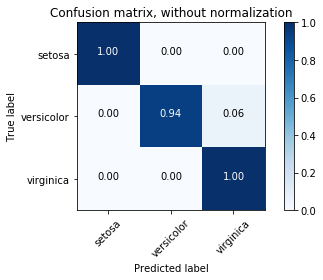

In [129]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(CM, classes=iris['target_names'], title='Confusion matrix, without normalization',normalize=True)
plt.show()

Confusion matrix, without normalization
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


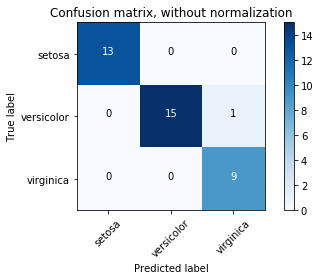

In [130]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(CM, classes=iris['target_names'], title='Confusion matrix, without normalization')
plt.show()

## Conclusion 

Let’s summarize our story here. We started with Problem statement and Algorithm selection by formulating of the task of predicting which species of iris a particular flower belongs to by using physical measurements of the flower and then we prepare our project and load the associated dataset. We used a dataset of measurements that was annotated by an expert with the correct species to build our model, making this a supervised learning task (three-class classification problem). After that we start explore and visualize the data to understand it, then split our data to training and test sets reaching to build our model and fitting it by training and then test. Simply we could summarize the basic steps in building machine learning application as follows:-

- Define the problem
- Describe the solution & select an algorithm 
- Prepare the project environment 
- Explore & visualize the data
- Prepare data and split it
- Build and train an initial model
- Evaluate & fine-tune 
- Build final model & evaluate it
- Apply the final model to unseen data

As a final word, Note that The `fit`, `predict`, and `score` methods are the common interface to supervised models in scikit-learn, and with the concepts introduced in this article, you can apply these models to many machine learning tasks. 